### imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generate Leaky Integrate-and-Fire Model

In [51]:
def lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, firing_treshold, V_spike, V_rest, deltaT, I = 0, Alternative = False, startRange = 0, endRange = 0):
    tau_m = Rm*Cm
    Vm = np.zeros(len(time))
    IRange = []
    if (Alternative):
        for i, t in enumerate(time):
            tempRandI = random.randrange(startRange, endRange)
            IRange.append(tempRandI)
            if t > t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + tempRandI*Rm) / tau_m * dt
            if Vm[i] >= Vth:
                Vm[i] += V_spike
                t_rest = t + tau_ref 
    else:
        for i, t in enumerate(time):
            IRange.append(I)
            if t > t_rest:
                Vm[i] = ( - ( Vm[i] - Vm[i-1] ) * dt / tau_m) + ( Rm * dt * I / tau_m + Vm[i-1] ) + ( dt * deltaT * (np.exp((Vm[i]-firing_treshold)/deltaT)) / tau_m )
            if Vm[i] >= Vth:
                if Vm[i] >= firing_treshold:
                    Vm[i] = V_rest
                else:
                    Vm[i] += V_spike
                t_rest = t + tau_ref
    return time, Vm, IRange

### Plot LIF

In [52]:
def plot_lif(model):
    [time, Vm, _] = model
    # plot membrane potential trace
    plt.plot(time, Vm)
    plt.title('Exponentially Leaky Integrate-and-Fire')
    plt.ylabel('U(V)')
    plt.xlabel('Time (msec)')
    plt.show()

### Dwar I - T Plot

In [53]:
def plot_i_t(model):
    [time, _, IRange] = model
    plt.plot(time, IRange)
    plt.title('I and Time')
    plt.ylabel('I(A)')
    plt.xlabel('Time (msec)')
    plt.show()

### Create Model

In [54]:
T = 50 # total time to simulate (msec)
dt = 0.125 # simulation time step (msec)
time = np.arange(0, T+dt, dt) # time array
t_rest = 0 # initial refractory time
Rm = 1 # resistance (kOhm)
Cm = 10 # capacitance (uF)
tau_ref = 4 # refractory period (msec)
Vth = 1 # spike threshold (V)
firing_treshold = 2
V_spike = 0.5 # spike delta (V)
I = 1.5 # input current (A)
V_rest = 0.2
deltaT = 0.001

model = lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, firing_treshold, V_spike, V_rest, deltaT,  I )

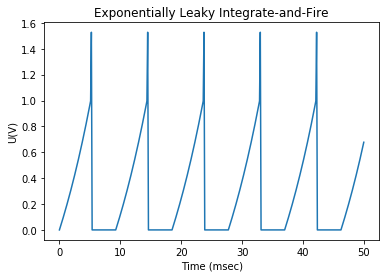

In [55]:
plot_lif(model)

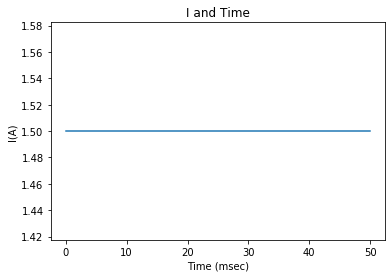

In [56]:
plot_i_t(model)

In [57]:
model_alt = lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, firing_treshold, V_spike, V_rest, deltaT, Alternative=True, startRange=1, endRange=5)

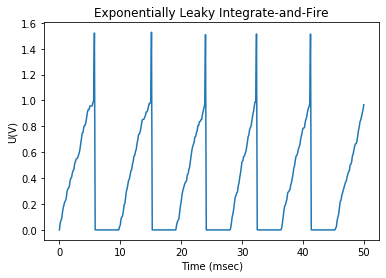

In [58]:
plot_lif(model_alt)

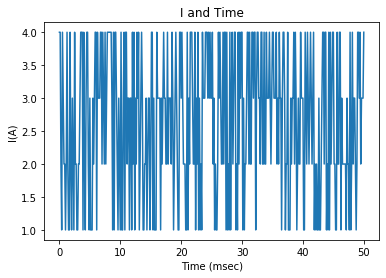

In [59]:
plot_i_t(model_alt)

When **I** is Increased in each Iteration (0.5 A)

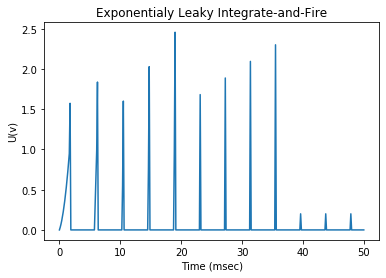

In [64]:
T = 50 # total time to simulate (msec)
dt = 0.125 # simulation time step (msec)
time = np.arange(0, T+dt, dt) # time array
t_rest = 0 # initial refractory time
Rm = 1 # resistance (kOhm)
Cm = 10 # capacitance (uF)
tau_ref = 4 # refractory period (msec)
Vth = 1 # spike threshold (V)
firing_treshold = 2
V_spike = 0.5 # spike delta (V)
I = 1.5 # input current (A)
V_rest = 0.2
deltaT = 0.001
tau_m = Rm*Cm
Vm = np.zeros(len(time))
IRange = []

for i, t in enumerate(time):
    I += 0.5
    if t > t_rest:
        Vm[i] = ( - ( Vm[i] - Vm[i-1] ) * dt / tau_m) + ( Rm * dt * I / tau_m + Vm[i-1] ) + ( dt * deltaT * (np.exp((Vm[i]-firing_treshold)/deltaT)) / tau_m )
    if Vm[i] >= Vth:
        if Vm[i] >= firing_treshold:
            Vm[i] = V_rest
        else:
            Vm[i] += V_spike
        t_rest = t + tau_ref

    
# plot membrane potential trace
plt.plot(time, Vm)
plt.title('Exponentialy Leaky Integrate-and-Fire')
plt.ylabel('U(v)')
plt.xlabel('Time (msec)')
plt.show()